In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = "../../../Data/mnist/"
data = pd.read_csv(path+"mnist_784.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [4]:
arr = []
count = 0
for index, value in data.iterrows():
    arr.append(np.array(value.iloc[:-1]).reshape(28, 28))
arr = np.array(arr)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(arr, 
                                                    data.iloc[:,-1], 
                                                    test_size=0.2, 
                                                    random_state=44)

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 160s 87ms/step - accuracy: 0.5680 - loss: 1.4997
Epoch 2/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 212s 121ms/step - accuracy: 0.9469 - loss: 0.1993
Epoch 3/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 239s 136ms/step - accuracy: 0.9610 - loss: 0.1494
Epoch 4/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 238s 136ms/step - accuracy: 0.9763 - loss: 0.0949
Epoch 5/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 224s 128ms/step - accuracy: 0.9786 - loss: 0.0817
Epoch 6/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 232s 133ms/step - accuracy: 0.9836 - loss: 0.0642
Epoch 7/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 221s 126ms/step - accuracy: 0.9874 - loss: 0.0517
Epoch 8/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 233s 133ms/step - accuracy: 0.9881 - loss: 0.0422
Epoch 9/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 236s 135ms/step - accuracy: 0.9897 - loss: 0.0406
Epoch 10/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 237s 135ms/step - accuracy: 0.9909 - loss: 0.0367
Epoch 11/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 205s 117ms/step - accuracy: 0.9920 - 

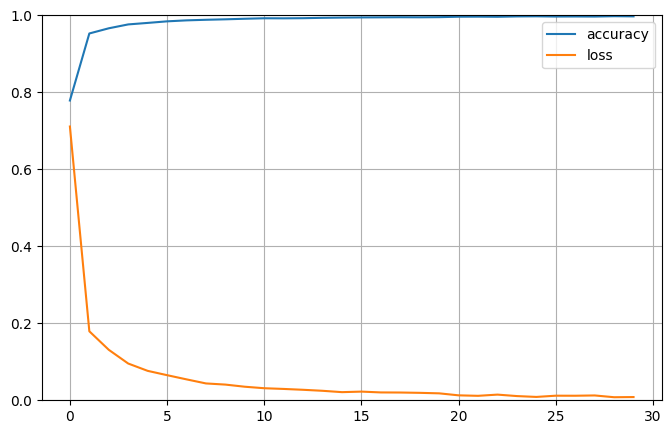

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
model.evaluate(X_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9938 - loss: 0.0594


[0.05786702036857605, 0.9939285516738892]

In [29]:
y_pred = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'